In [1]:
import  lib_Experimentum    as      Exp
from    Alessandria         import  *
from    Models              import  S_2_Generate, S_Dynamical_Form_Factor_2, S_Dynamical_Form_Factor_0, S_0_Generate

import pandas as pd
import  numpy               as      np
from    scipy.io            import  loadmat

from    matplotlib.pyplot   import  plot
import  matplotlib.pyplot   as      plt


import  time

spectra_path        =   '../BRILLOUIN/Claudia/DaticellBoniPuntiDoppi/'
spectra_filename    =   '20191218_K27M'

VIPA_path           =   '../BRILLOUIN/Claudia/DaticellBoniPuntiDoppi/picchi_elastici_con_filtro_100msexp/Pos0/'
VIPA_filename       =   'img_000000000_Default_000.tif'


syg_kwargs          =   {'height': 20, 'distance': 20, 'width': 5.}
syg_kwargs_brill    =   {'height': 5, 'distance': 50, 'width': 5.}

cols        = ('Co', 'Omega', 'Gamma', 'Delta', 'tau', 'delta_width', 'delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset')
cols_mark   = ('Co', 'Omega', 'Gamma', 'delta_width', 'delta_amplitude', 'A', 'mu', 'sigma', 'shift', 'offset')
cols_real   = ('Co', 'Omega', 'Gamma', 'Delta', 'tau', 'delta_width', 'delta_amplitude','shift', 'offset')
cols_gauss  = ( 'A', 'mu', 'sigma')

ATTENZIONE funzione da aggiornare



ATTENZIONE guarda Get_VIPA_mat
Lo spettro è bono


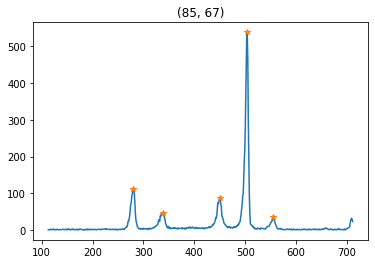

In [2]:
#0) importo dati e inizializzo oggetti
i   =   85
j   =   67
y    =   Import_from_Matlab(spectra_filename, spectra_path, var_name = 'y')[i][j]
Data    =   Exp.Spectrum(name = str((i,j)))
Data.Get_Spectrum(y = np.resize(y, np.max(y.shape)), offset = 183., cut = True, cut_range = (100, 680))
Data.Get_Spectrum_Peaks(**syg_kwargs)
Data.Get_VIPA_tif(VIPA_filename, VIPA_path)

plt.figure()
plt.plot(Data.x, Data.y)
plt.plot(Data.x[Data.peaks[0]], Data.y[Data.peaks[0]], '*')
plt.title(str((i,j)))

check = Data.Check_Spectrum(saturation_width = 13.5)

if      check == 1  : nature    = 'saturo'
elif    check == 2  : nature    = 'brillouin_higher'
elif    check == 3  : nature    = 'invisible'
else:                 nature    = 'bono'
print('Lo spettro è '+nature)

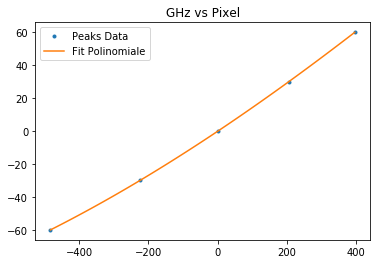

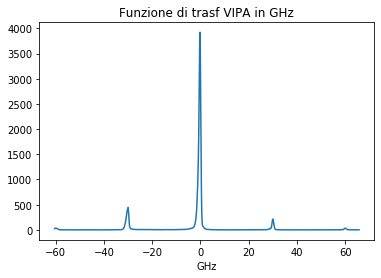



Ho stimato 12 parametri iniziali per il fit che andrai a fare

Co  = 1.000 

Omega  = 7.400 

Gamma  = 0.988 

Delta  = 0.988 

tau  = 100.000 

delta_width  = 0.500 

delta_amplitude  = 1.000 

A  =  nan 

mu  =  nan 

sigma  =  nan 

shift  = 0.000 

offset  = 11.372 

Ho stimato i parametri della gaussiana come A = 3965.50	mu  = -2.09	sigma = -13.30
E li ho aggiunti ai parametri iniziali per il fit. Ora conosco 12 parametri su 12 



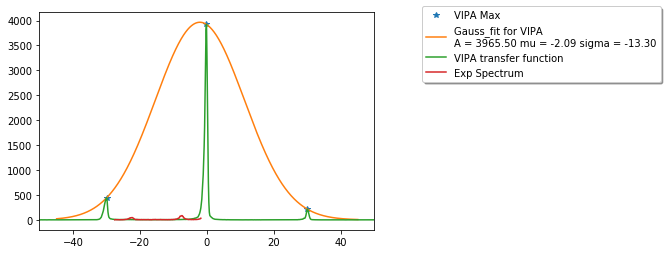

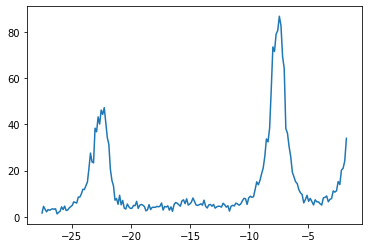

In [3]:
#1) Operazioni di modifica Spettro

Data.How_Many_Peaks_To_VIPA(treshold = 30)
Data.Fit_Pixel2GHz(fig = True)
Data.VIPA_Pix2GHz(fig = True)
Data.Spectrum_Pix2GHz()

if nature == 'brillouin_higher':  

    Data.Get_Spectrum_Peaks(**syg_kwargs_brill)
    Data.Get_Spectrum_4_Peaks_by_Order()

else:           

    Data.Get_Spectrum_4_Peaks_by_Height()

Data.Cut_n_Estimate_Spectrum(estimate = True, verbose = True, distanza = 0.25, columns = cols)
Data.Fit_VIPA_Gaussian(verbose = True, fig = True)
plt.figure()
plt.plot(Data.x_freq, Data.y)

costo = 152102.7420098016
s impiegati a fare il fit  12.131381741000002 

costo dopo fit = 970.7800660229578
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.078965  7.466969  0.137619     0.754538         0.054626   
StdErrs   0.127465  0.025613  0.015502     0.320273         0.070628   
Initials  1.000000  7.400109  0.988196     0.500000         1.000000   

                     A         mu      sigma     shift     offset  
Values    3.689070e+03  -1.877295 -12.385273  0.156094   2.119483  
StdErrs   8.226368e+09  40.077571  18.209045  0.025875   0.364992  
Initials  3.965503e+03  -2.085884 -13.301333  0.000000  11.371872  
Valore stimato della cost function prima del fit totale con fit markoviano:
970.7800660229578


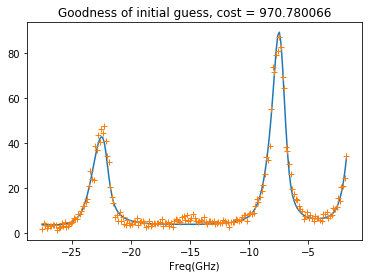

In [4]:
#3) fit markoviano
Data.Get_p0_by_Markov(Data.p0.values[0],treshold = 1000)
print(Data.Fit_Params)
Data.Take_A_Look_Before_Fitting()

9 
 9
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         9.7078e+02                                    6.84e+02    
       1              2         7.3090e+02      2.40e+02       8.77e+00       4.11e+02    
       2              3         6.8893e+02      4.20e+01       1.45e-02       1.24e+02    
       3              4         6.6078e+02      2.81e+01       1.35e+01       9.31e+01    
       4              5         6.4537e+02      1.54e+01       9.61e+00       5.76e+01    
       5              6         6.3837e+02      7.00e+00       6.93e+00       3.97e+01    
       6              7         6.3265e+02      5.72e+00       8.15e+00       8.35e+00    
       7              8         6.3064e+02      2.01e+00       9.49e+00       2.60e+00    
       8              9         6.3024e+02      4.03e-01       5.46e+00       9.55e-01    
       9             10         6.3014e+02      9.33e-02       2.87e+00       2.37e-

1

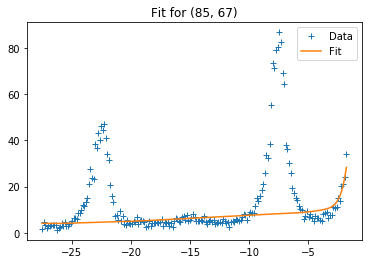

In [12]:
#4) fit totale
percents                    =   (0.2, 0.1, 0.15, 'positive', 'positive', 0.15, 0.15, np.inf, np.inf)
Data.Get_Fit_Bounds(percents, columns = cols_real)
p_gauss = Data.p0[list(cols_gauss)].values[0]
Data.Get_p0(Data.p0[list(cols_real)].values[0], cols_real)
Data.Non_Linear_Least_Squares(p_gauss, cols_real, bound = (Data.bounds['down'].values, Data.bounds['up'].values), verbose = 2, fig = True, max_nfev = 20)


In [13]:
Data.Fit_Params

,Co,Omega,Gamma,Delta,tau,delta_width,delta_amplitude,shift,offset
Values,0.063172,8.211459,1.135725e+00,3.268590e+01,0.002587,0.641357,0.046432,0.026363,2.939170
StdErrs,668.470258,653197.834927,3.160264e+06,2.858742e+06,160.094354,1.174468,0.187672,1.802223,12.758725
Initials,0.078965,7.466969,9.881956e-01,1.000000e+02,0.137619,0.754538,0.054626,0.156094,2.119483


In [8]:
Data.p0

,Co,Omega,Gamma,Delta,tau,delta_width,delta_amplitude,A,mu,sigma
Values,1.0,7.525954,0.974416,0.5,1.0,3965.502877,-2.085884,-13.301333,0.0,26.439036


In [5]:
Data.Brillouin_HIgher

False

Ho trovato valore dell'altezza per avere 4 picchi: 12.861111
 (array([117, 178, 346, 400], dtype=int64), {'peak_heights': array([1.28888889e+01, 1.00066111e+04, 1.74444444e+02, 2.99277222e+04]), 'prominences': array([8.38888889e+00, 9.97233333e+03, 7.12777778e+01, 2.99263889e+04]), 'left_bases': array([ 34,  34, 277,  34], dtype=int64), 'right_bases': array([137, 277, 355, 507], dtype=int64), 'widths': array([5.082644  , 9.31304439, 7.93207654, 8.62797485]), 'width_heights': array([8.69444444e+00, 5.02044444e+03, 1.38805556e+02, 1.49645278e+04]), 'left_ips': array([115.34313725, 171.01576886, 341.56527094, 394.92022537]), 'right_ips': array([120.42578125, 180.32881325, 349.49734748, 403.54820021])})


 Ho trovato 4 picchi nel tuo spettro sperimentale con le caratteristiche richieste
 Altezza > 12.86 
 Spessore > 5.00 



 Il picco 1 ha: 	 indice = 117 	 x_value (GHz) = -37.19 	 ampiezza(GHz) = 5.08 	 altezza = 12.89 


 Il picco 2 ha: 	 indice = 178 	 x_value (GHz) = -29.66 	 ampiezza(

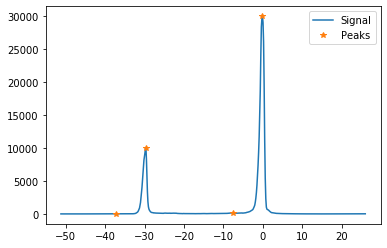

In [18]:
Data.How_Many_Peaks_To(fig = True, verbose=True, i_know_it_is=True)